In [5]:
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time
import gensim

In [6]:
startTime = time.time()

data = pd.read_csv('IMDB Dataset.csv')

reviews = data['review']
sentiments = data['sentiment']

print('Number of Reviews: ', len(reviews))
print('% Positive: ', (len(reviews[sentiments == 'positive'])/len(reviews))*100)
print('% Negative: ', (len(reviews[sentiments == 'negative'])/len(reviews))*100)

#Removing Punctuation
reviews = reviews.str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

# Creating Bag Of Words
vectorizer = CountVectorizer(stop_words='english') #Removes some words like 'the' 'and' 'a' 
x = vectorizer.fit_transform(reviews)

#Creating Word to Vec
# x = gensim.models.Word2Vec(sentences=reviews, vector_size=100, window=3, min_count=1, workers=3)

#Predictive Model Split
x_train, x_test, y_train, y_test = train_test_split(x, sentiments, test_size=0.2, random_state=1)

Number of Reviews:  50000
% Positive:  50.0
% Negative:  50.0


In [7]:
from sklearn import tree

def DT(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time() 
        clf = tree.DecisionTreeClassifier(max_depth=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start

        print(f"Max Depth {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Decision Tree: Accuracy vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Decision Tree Depth: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [8]:
def KNN(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = KNeighborsClassifier(n_neighbors=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"KNN N = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('K-Nearest Neighbor: Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [9]:
def LR(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = LogisticRegression(C=param, max_iter=500)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"LR C = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Logistic Regression : Accuracy vs. C Value')
    plt.xlabel('C Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best C Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [10]:
def RF(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = RandomForestClassifier(n_estimators=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"Number of Trees = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Randmon Forest : Accuracy vs. Number of Trees')
    plt.xlabel('Number of Trees')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Number of Trees: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best


Max Depth 1 Completed in 20 Seconds with Accuracy of 61.60%
Max Depth 5 Completed in 23 Seconds with Accuracy of 69.21%
Max Depth 10 Completed in 34 Seconds with Accuracy of 72.17%
Max Depth 50 Completed in 139 Seconds with Accuracy of 74.17%
Max Depth 100 Completed in 174 Seconds with Accuracy of 73.38%


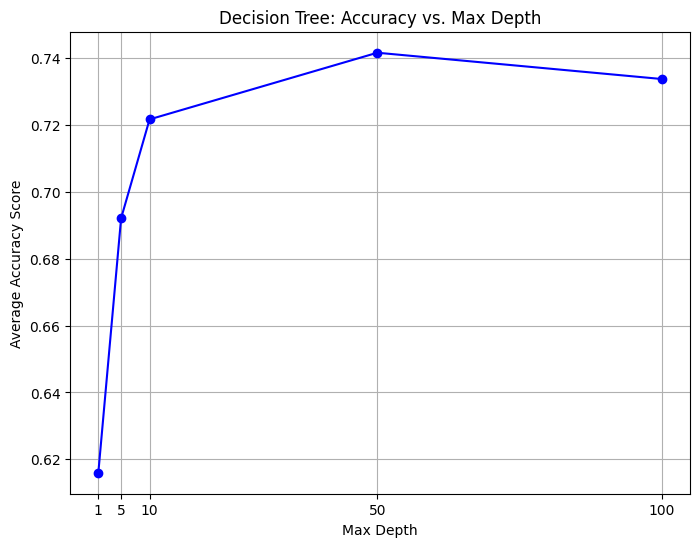

Best Decision Tree Depth:  50
Accuracy: 74.17 %


In [11]:
DT_DEPTHS = [1, 5, 10, 50, 100]
bestD = DT(x_train, y_train, DT_DEPTHS)

KNN N = 1 Completed in 40 Seconds with Accuracy of 58.36%
KNN N = 5 Completed in 48 Seconds with Accuracy of 59.45%
KNN N = 10 Completed in 48 Seconds with Accuracy of 60.08%
KNN N = 50 Completed in 48 Seconds with Accuracy of 67.63%
KNN N = 100 Completed in 48 Seconds with Accuracy of 69.33%
KNN N = 150 Completed in 49 Seconds with Accuracy of 69.73%


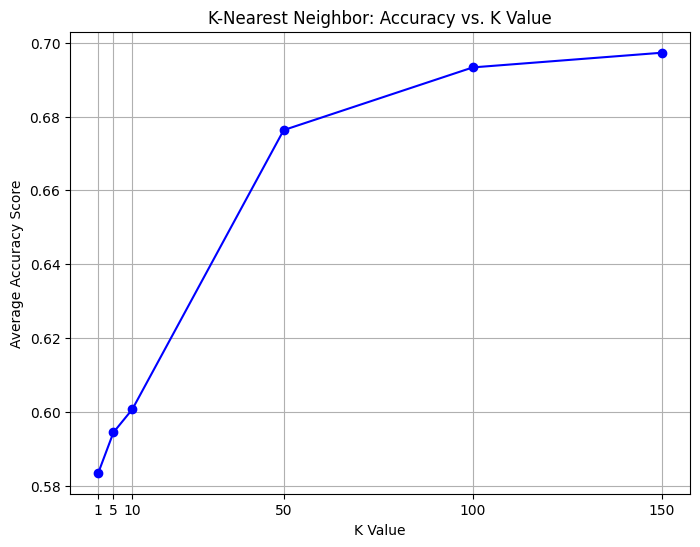

Best K Value:  150
Accuracy: 69.73 %


In [12]:
kVals = [1, 5, 10, 50, 100, 150]
bestK = KNN(x_train, y_train, kVals)

LR C = 0.001 Completed in 3 Seconds with Accuracy of 85.08%
LR C = 0.01 Completed in 6 Seconds with Accuracy of 88.17%
LR C = 0.1 Completed in 10 Seconds with Accuracy of 88.88%
LR C = 0.5 Completed in 13 Seconds with Accuracy of 88.47%
LR C = 1 Completed in 16 Seconds with Accuracy of 88.13%


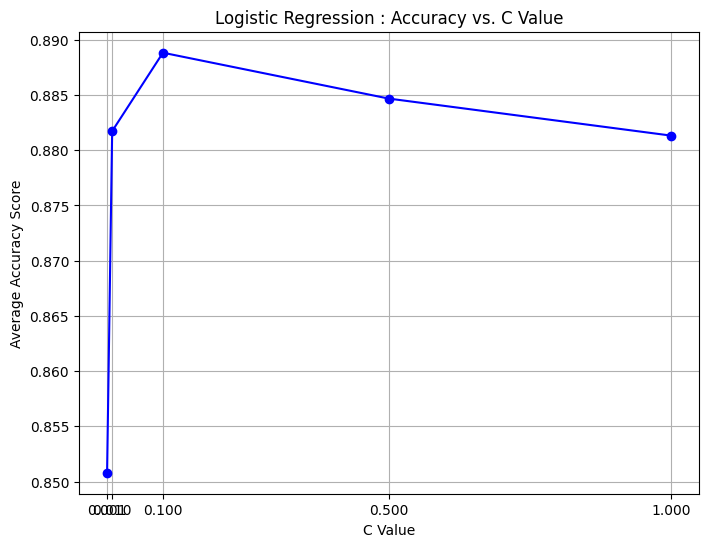

Best C Value:  0.1
Accuracy: 88.88 %


In [13]:
cVals = [0.001, 0.01, 0.1, 0.5, 1]
bestC = LR(x_train, y_train, cVals)

Number of Trees = 5 Completed in 44 Seconds with Accuracy of 73.00%
Number of Trees = 10 Completed in 85 Seconds with Accuracy of 76.65%
Number of Trees = 50 Completed in 430 Seconds with Accuracy of 84.23%
Number of Trees = 100 Completed in 851 Seconds with Accuracy of 85.66%


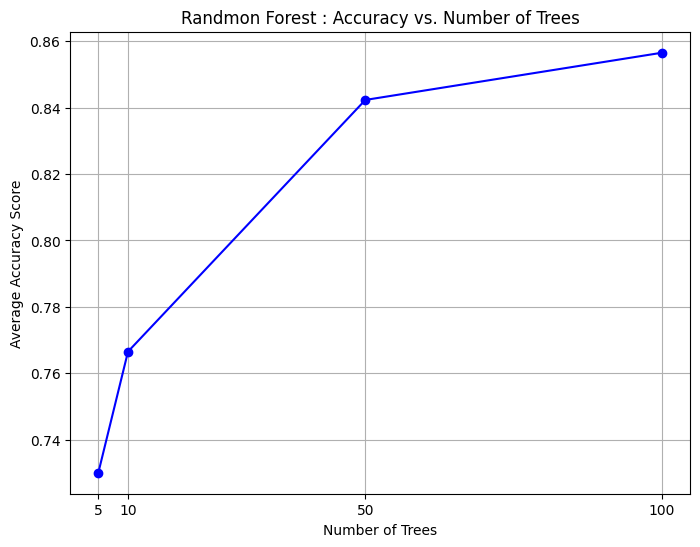

Best Number of Trees:  100
Accuracy: 85.66 %


In [14]:
trees = [5, 10, 50, 100]
bestTrees = RF(x_train, y_train, trees)

In [30]:
start = time.time()
DT = tree.DecisionTreeClassifier(max_depth=bestD)
DT.fit(x_train, y_train)
print(f"Time to Train DT {(time.time() - start):.0f} Seconds")

start = time.time()
KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(x_train, y_train)
print(f"Time to Train KNN {(time.time() - start):.0f} Seconds")

start = time.time()              
LR = LogisticRegression(C=bestC, max_iter=500)
LR.fit(x_train, y_train)
print(f"Time to Train LR {(time.time() - start):.0f} Seconds")

start = time.time()              
RF = RandomForestClassifier(n_estimators=bestTrees)
RF.fit(x_train, y_train)
print(f"Time to Train RF {(time.time() - start):.0f} Seconds")

elapsed = time.time() - startTime
print(f"{elapsed:.0f} Seconds to Evaluate Hyperparameters and train models")

Time to Train DT 38 Seconds
Time to Train KNN 0 Seconds
Time to Train LR 3 Seconds
Time to Train RF 254 Seconds
8004 Seconds to Evaluate Hyperparameters and train models


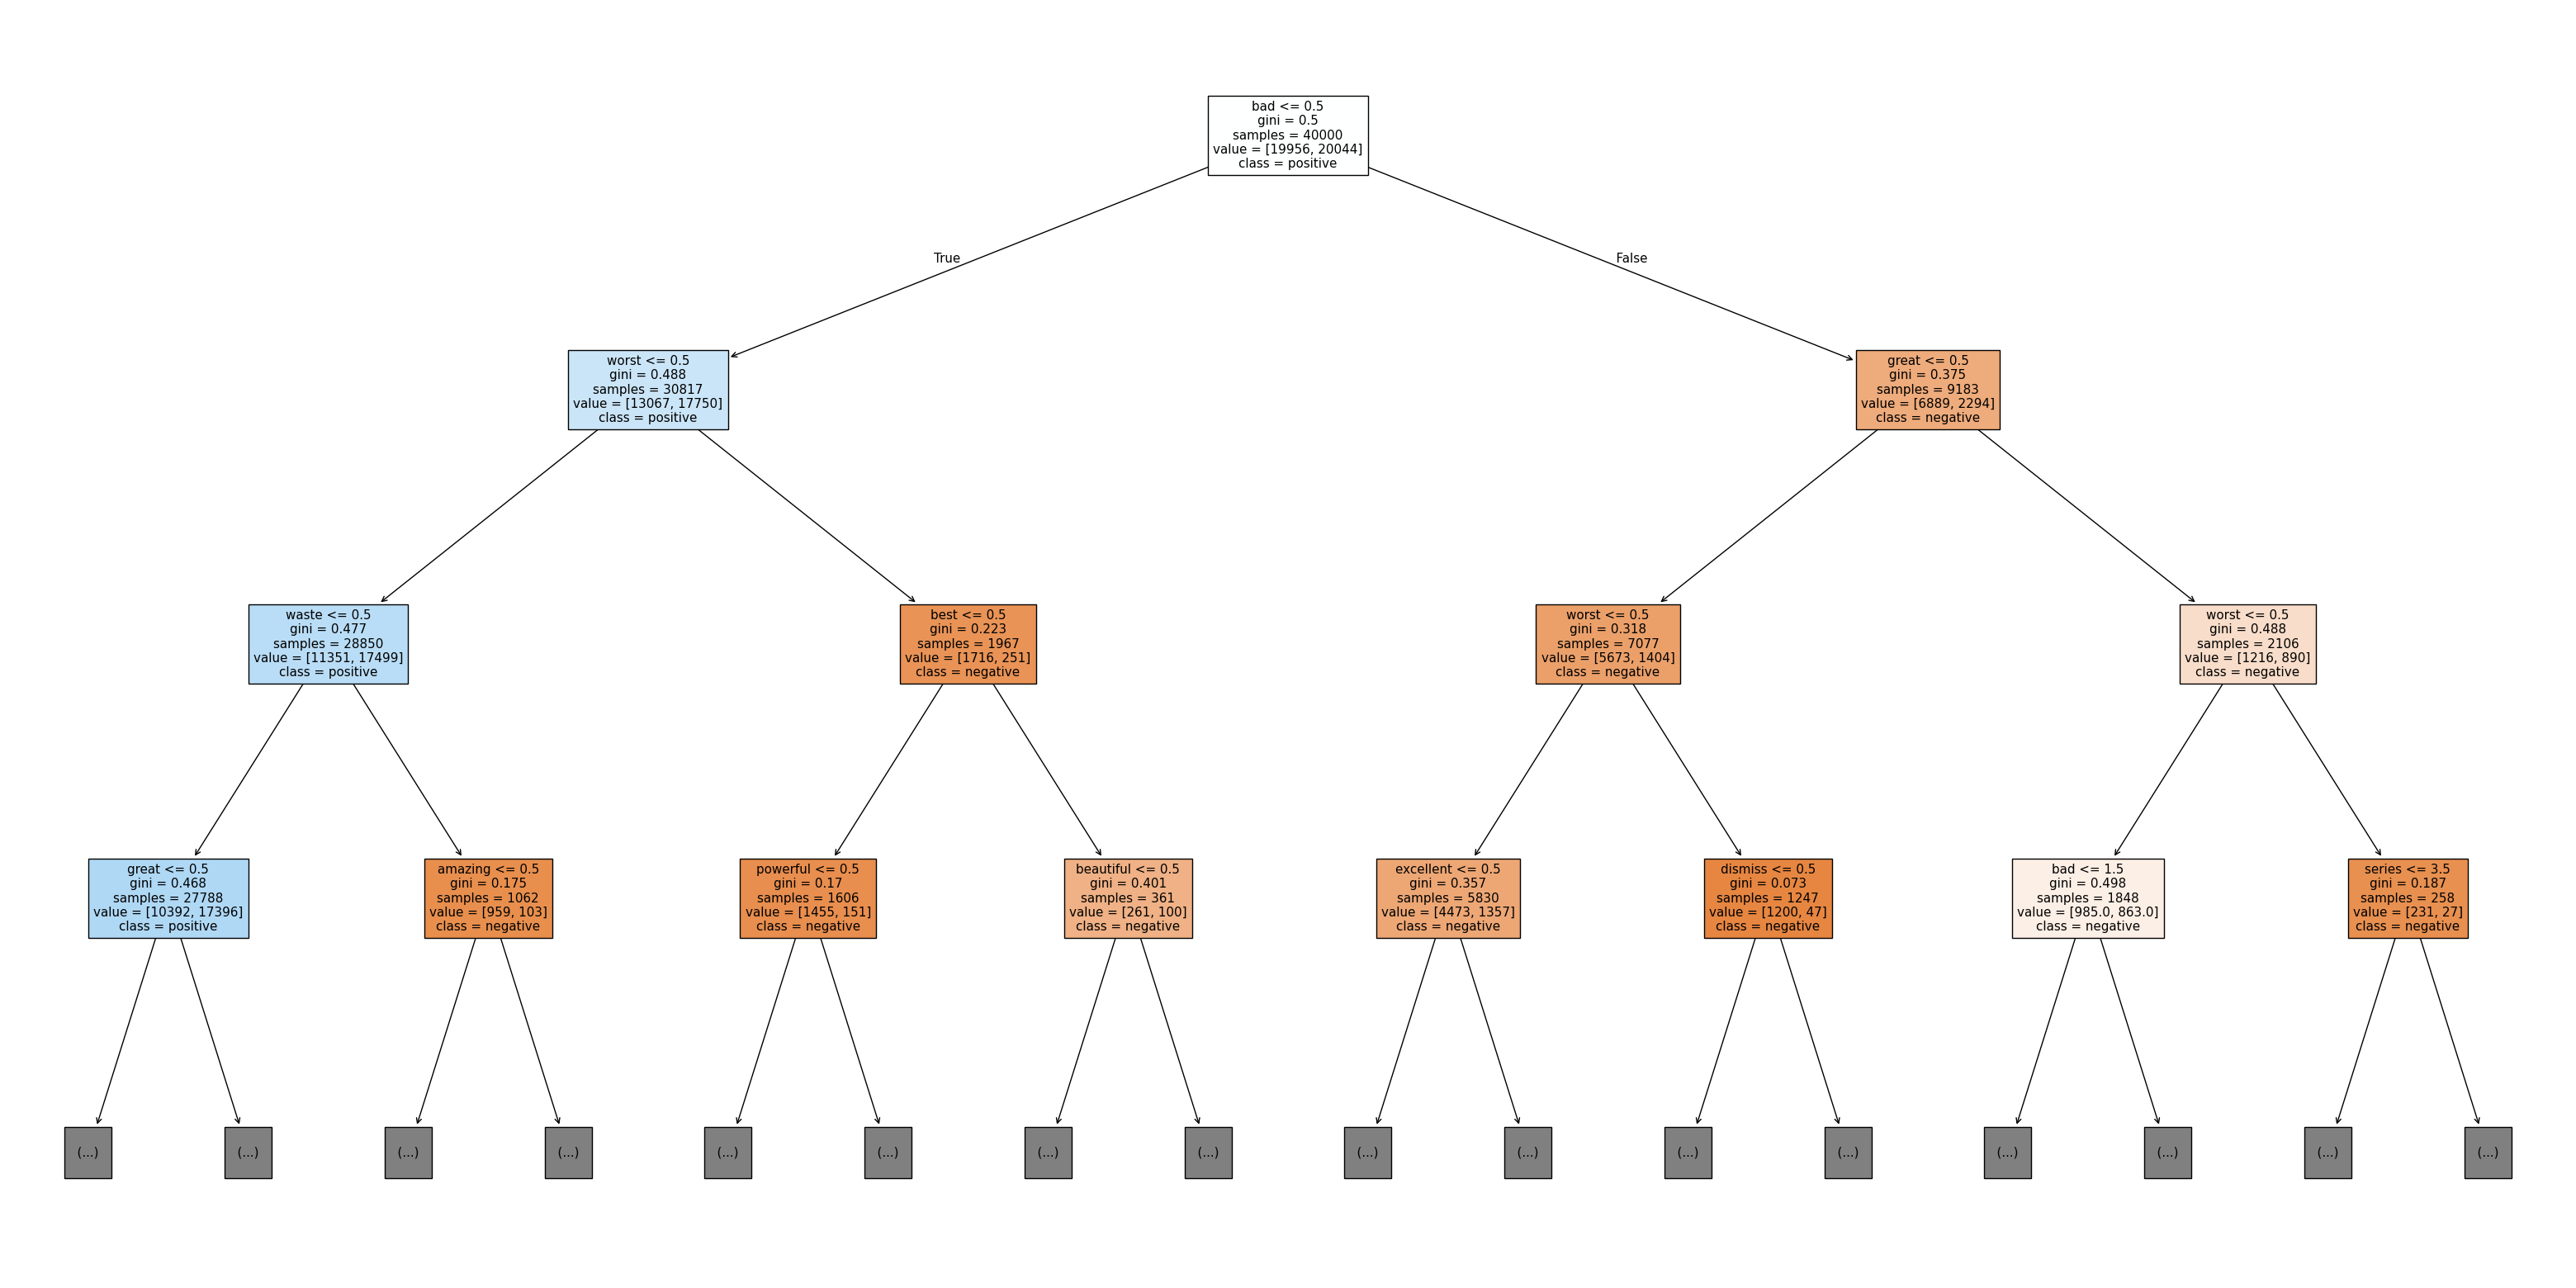

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()
class_names = DT.classes_

plt.figure(figsize=(40, 20))
plot_tree(DT, filled=True, feature_names=feature_names, class_names=class_names, max_depth=3)
plt.show()


In [17]:
importances = DT.feature_importances_

words = vectorizer.get_feature_names_out()
importantWords = pd.DataFrame({
    'word': words,
    'importance': importances
})

mostImportant = importantWords.sort_values(by='importance', ascending=False)
print("Most Important Words\n")
print(mostImportant.head(15))


Most Important Words

             word  importance
14632         bad    0.098447
177191      worst    0.060265
68473       great    0.041567
172857      waste    0.037673
14033       awful    0.025312
21596      boring    0.018210
54362   excellent    0.017211
18188        best    0.013657
158623   terrible    0.011898
123107       poor    0.010354
153502     stupid    0.010039
123122     poorly    0.008253
176538  wonderful    0.007037
122111       plot    0.006623
94542        love    0.006329


Decision Tree Accuracy: 74.43%
K Nearest Neighbor Accuracy: 69.73%
Logistic Regression Accuracy: 89.27%
Random Forest Accuracy: 85.86%

Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.71      0.74      5044
    positive       0.72      0.78      0.75      4956

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

K Nearest Neighbor Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.68      0.70      5044
    positive       0.69      0.71      0.70      4956

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0

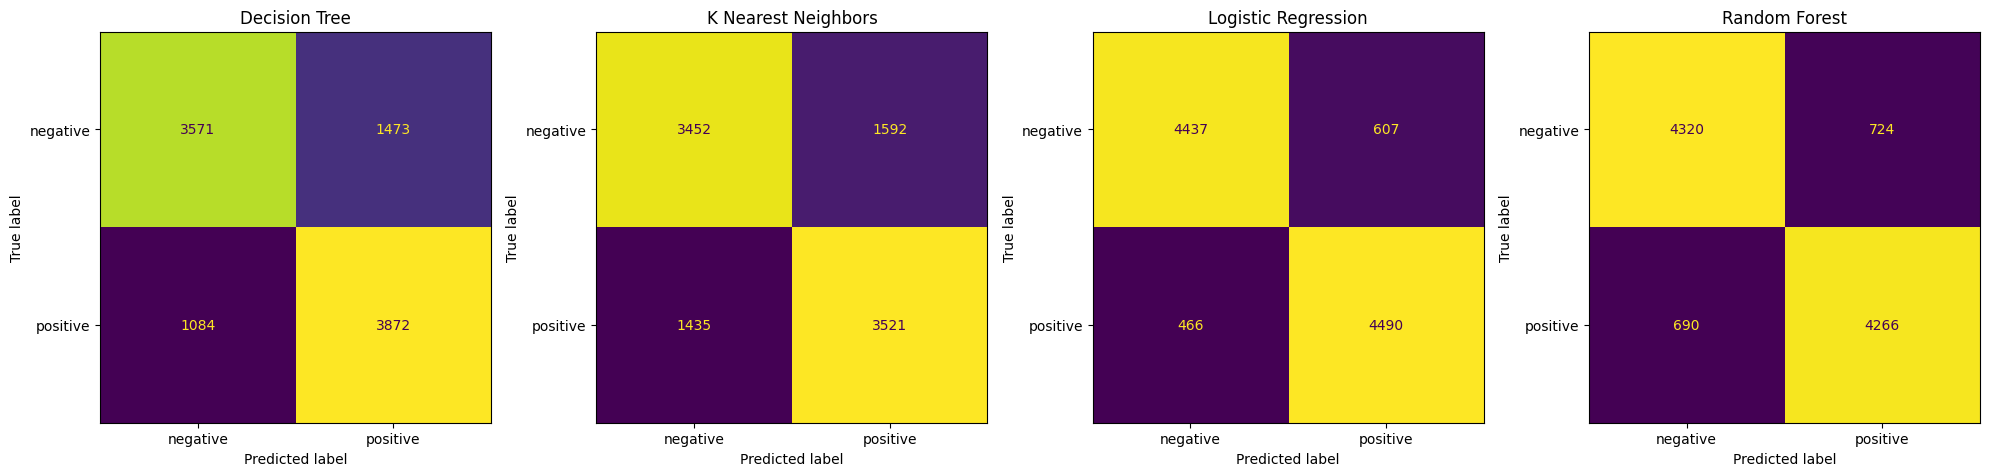

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using models
predictDT = DT.predict(x_test)
predictKNN = KNN.predict(x_test)
predictLR = LR.predict(x_test)
predictRF = RF.predict(x_test)

# Accuracy scores
DTAcc = accuracy_score(y_test, predictDT)
KNNAcc = accuracy_score(y_test, predictKNN)
LRAcc = accuracy_score(y_test, predictLR)
RFAcc = accuracy_score(y_test, predictRF)

#Accuracies
print(f"Decision Tree Accuracy: {DTAcc*100:.2f}%")
print(f"K Nearest Neighbor Accuracy: {KNNAcc*100:.2f}%")
print(f"Logistic Regression Accuracy: {LRAcc*100:.2f}%")
print(f"Random Forest Accuracy: {RFAcc*100:.2f}%\n")

# Classification Reports
print("Decision Tree Classification Report:\n", classification_report(y_test, predictDT))
print("K Nearest Neighbor Classification Report:\n", classification_report(y_test, predictKNN))
print("Logistic Regression Classification Report:\n", classification_report(y_test, predictLR))
print("Random Forest Classification Report:\n", classification_report(y_test, predictRF))

# Confusion Matrices
confDT = confusion_matrix(y_test, predictDT)
confKNN = confusion_matrix(y_test, predictKNN)
confLR = confusion_matrix(y_test, predictLR)
confRF = confusion_matrix(y_test, predictRF)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

ConfusionMatrixDisplay(confusion_matrix=confDT, display_labels=DT.classes_).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay(confusion_matrix=confKNN, display_labels=KNN.classes_).plot(ax=axes[1], colorbar=False)
axes[1].set_title("K Nearest Neighbors")

ConfusionMatrixDisplay(confusion_matrix=confLR, display_labels=LR.classes_).plot(ax=axes[2], colorbar=False)
axes[2].set_title("Logistic Regression")

ConfusionMatrixDisplay(confusion_matrix=confRF, display_labels=RF.classes_).plot(ax=axes[3], colorbar=False)
axes[3].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [27]:
import numpy as np
import random

# Determine Best Model Based on Accuracy
models = [[DT, DTAcc],[KNN, KNNAcc],[LR, LRAcc],[RF, RFAcc]]
bestModel, bestAccuracy = max(models, key=lambda x: x[1])

seeds = [random.randint(1, 100) for _ in range(5)]
accuracies = []

print('Best Model:', bestModel)
print('Tesing 5 random Seeds:')
for seed in seeds:
    bestModel.set_params(random_state=seed, max_iter=500)
    bestModel.fit(x_train, y_train)
    
    predictions = bestModel.predict(x_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append((accuracy))

    print(f"Seed: {seed} Accuracy: {accuracy*100:.2f}%")

mean = np.mean(accuracies)
stdDeviation = np.std(accuracies)

print(f"\nMean Accuracy: {mean:.2f}%")
print(f"Standard Deviation: {stdDeviation:.2f}")


Best Model: LogisticRegression(C=0.1, max_iter=500, random_state=6)
Tesing 5 random Seeds:
Seed: 71 Accuracy: 89.33%
Seed: 52 Accuracy: 89.33%
Seed: 12 Accuracy: 89.33%
Seed: 49 Accuracy: 89.33%
Seed: 24 Accuracy: 89.33%

Mean Accuracy: 0.89%
Standard Deviation: 0.00


Test Reviews

In [29]:
newReview = "This movie is good"

cleaned = newReview.lower().strip().translate(str.maketrans('', '', string.punctuation))
vectorized = vectorizer.transform([cleaned])

predictionDT = DT.predict(vectorized)
predictionKNN = KNN.predict(vectorized) 
predictionLR = LR.predict(vectorized)
predictionRF = RF.predict(vectorized)

print('Decision Tree:       Predicted Sentiment for: "' + newReview + '" is ' + predictionDT[0].upper())
print('K-Nearest Neighbor:  Predicted Sentiment for: "' + newReview + '" is ' + predictionKNN[0].upper())
print('Logistic Regression: Predicted Sentiment for: "' + newReview + '" is ' + predictionLR[0].upper())
print('Random Forest:       Predicted Sentiment for: "' + newReview + '" is ' + predictionRF[0].upper())

Decision Tree:       Predicted Sentiment for: "This movie is good" is POSITIVE
K-Nearest Neighbor:  Predicted Sentiment for: "This movie is good" is POSITIVE
Logistic Regression: Predicted Sentiment for: "This movie is good" is POSITIVE
Random Forest:       Predicted Sentiment for: "This movie is good" is POSITIVE
